In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('D:\College\Sem-6\Sem-6_Krish\DMA-FinalProject\data.csv')

In [3]:
dataset.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [4]:
dataset["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [5]:
x = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [6]:
from sklearn.preprocessing import LabelEncoder
yLabelEncoder = LabelEncoder()
y = yLabelEncoder.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from xgboost import XGBClassifier
modelxgb = XGBClassifier()
modelxgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [10]:
from sklearn.model_selection import cross_val_score
accuracyList_xgb = cross_val_score(estimator=modelxgb, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f}%".format(accuracyList_xgb.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracyList_xgb.std()*100))

Accuracy: 95.23%
Standard Deviation: 3.25%


In [11]:
modelxgb_upd = XGBClassifier(max_depth=5,n_estimators=100)
modelxgb_upd.fit(X_train, y_train)
predxgb = modelxgb_upd.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score

accuracy_xgb = accuracy_score(y_test, predxgb)
presicion_xgb = precision_score(y_test, predxgb, average='macro')
recall_xgb = recall_score(y_test, predxgb, average='macro')
f1Score_xgb = f1_score(y_test, predxgb, average='macro')
confusionMatrix_xgb = confusion_matrix(y_test, predxgb)

print("Metric Scores")
print("Accuracy: " + str(accuracy_xgb*100))
print("Precision: " + str(presicion_xgb*100))
print("Recall: " + str(recall_xgb*100))
print("f1 Score: " + str(confusionMatrix_xgb*100))

Metric Scores
Accuracy: 97.6608187134503
Precision: 97.4867724867725
Recall: 97.4867724867725
f1 Score: [[10600   200]
 [  200  6100]]


In [13]:
from sklearn.metrics import confusion_matrix
confusionMatrix_xgb = confusion_matrix(y_test, predxgb)
print(confusionMatrix_xgb)

[[106   2]
 [  2  61]]


In [14]:
tn, fp, fn, tp = confusionMatrix_xgb.ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 106
False Positives: 2
False Negatives: 2
True Positives: 61


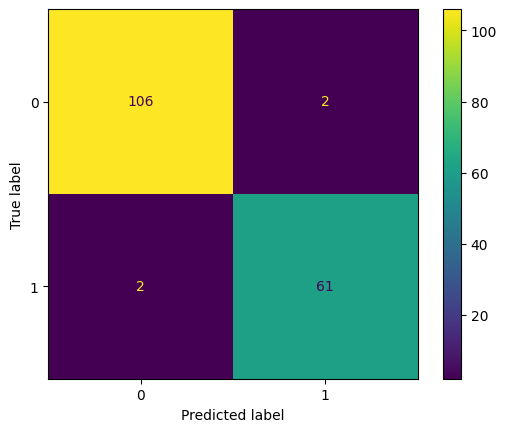

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix_xgb)
disp.plot()
plt.show()

In [17]:
import pickle

fileName = "model.pkl"
with open(fileName, 'wb') as files:
    pickle.dump(modelxgb_upd,files)